In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('darkgrid')

#### Functions for European option pricing using Black-Scholes

S = current stock price,
K = strike price,
sigma= volatility,
t = time to maturity (in years),
r = risk-free rate,

In [4]:
#Call option
def bs_call(S, K, r, t, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)

#Put option
def bs_put(S, K, r, t, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return -S * norm.cdf(-d1) + K * np.exp(-r*t) * norm.cdf(-d2)


#### Options Greeks

In [47]:
#Delta for call option
def delta_call(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)

#Delta for put option
def delta_put(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1) - 1

#Gamma for call and put options
def gamma(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.pdf(d1)/(S*sigma*np.sqrt(t))

#Theta for call option
def theta_call(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return (-S*norm.pdf(d1)*sigma/(2*np.sqrt(t)) - r*K*np.exp(-r*t)*norm.cdf(d2))

#Theta for put option
def theta_put(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(t)) + r * K * np.exp(-r*t) * norm.cdf(-d2))

#Vega for call and put options
def vega(S, K, r, t, sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return S * norm.pdf(d1) * np.sqrt(t)

#Rho for call option
def rho_call(S, K, r, t, sigma):
    d2 = (np.log(S/K)+(r - 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return K * t * np.exp(-r*t) * norm.cdf(d2)
#Rho for put option
def rho_put(S, K, r, t, sigma):
    d2 = (np.log(S/K)+(r - 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return -K * t * np.exp(-r*t) * norm.cdf(-d2)

In [27]:
# Spot price and time grid
S_vals = np.linspace(50, 150, 100) #Spot prices
T_vals = np.linspace(1/12, 5, 60) #time to expiration (in years)
#S_grid, T_grid = np.meshgrid(S_vals, T_vals)

# Parameters
K = 100 #Strike price
sigma = 0.3 # annualized volatility
r = 0 #risk-free rate

 Lets see how option price evolves over time to expiration for fixed spot prices.

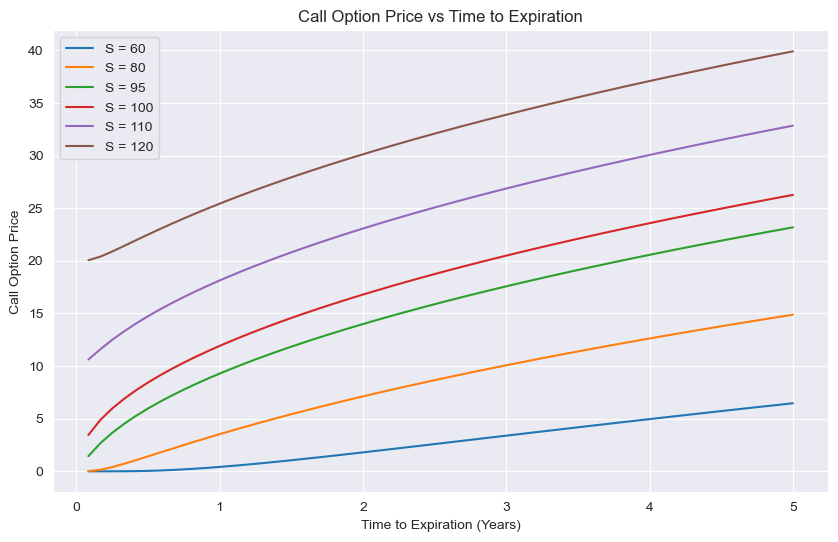

In [19]:
plt.figure(figsize=(10, 6))
for S0 in [60, 80, 95, 100, 110, 120]:
    call = bs_call(S0, K, r, T_vals, sigma)
    plt.plot(T_vals, call, label=f'S = {S0}')

plt.title('Call Option Price vs Time to Expiration')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()



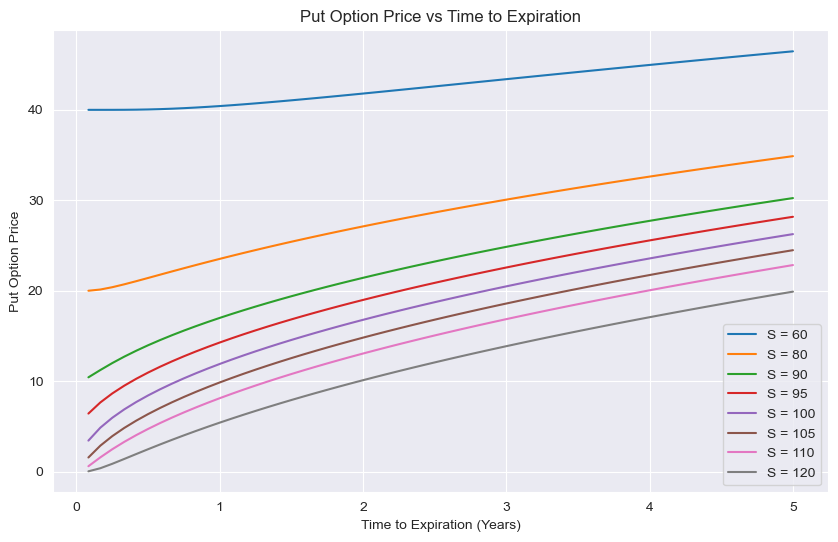

In [20]:
plt.figure(figsize=(10, 6))
for S0 in [60, 80, 90, 95, 100, 105, 110, 120]:
    put = bs_put(S0, K, r, T_vals, sigma)
    plt.plot(T_vals, put, label=f'S = {S0}')

plt.title('Put Option Price vs Time to Expiration')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Put Option Price')
plt.legend()
plt.grid(True)
plt.show()


Lets see how option price changes as the spot price changes, at fixed times to expiration

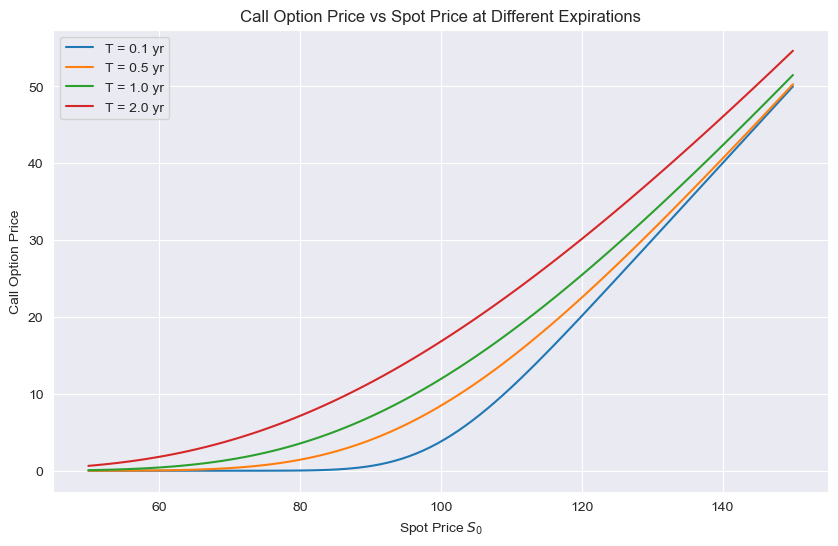

In [21]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    call = bs_call(S_vals, K, r, T, sigma)
    plt.plot(S_vals, call, label=f'T = {T:.1f} yr')

plt.title('Call Option Price vs Spot Price at Different Expirations')
plt.xlabel('Spot Price $S_0$')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()


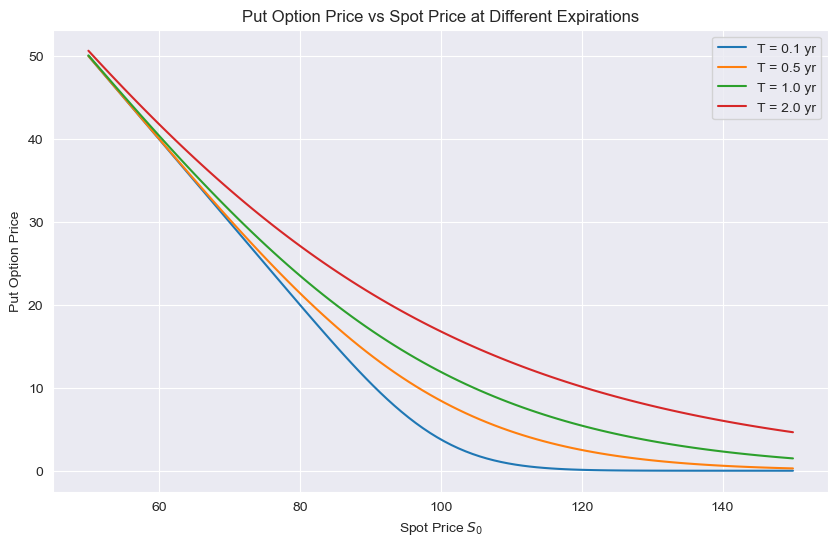

In [22]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    put = bs_put(S_vals, K, r, T, sigma)
    plt.plot(S_vals, put, label=f'T = {T:.1f} yr')

plt.title('Put Option Price vs Spot Price at Different Expirations')
plt.xlabel('Spot Price $S_0$')
plt.ylabel('Put Option Price')
plt.legend()
plt.grid(True)
plt.show()


#### Options Delta vs Spot Prices (Fix Time to Expiration)

##### Call Option

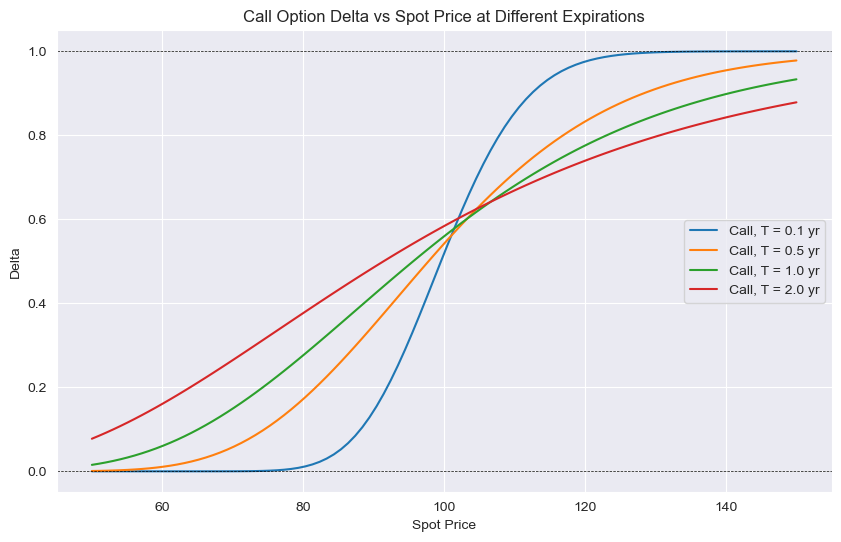

In [30]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    delta_c = delta_call(S_vals, K, r, T, sigma)
    plt.plot(S_vals, delta_c, label=f'Call, T = {T:.1f} yr')

plt.title('Call Option Delta vs Spot Price at Different Expirations')
plt.xlabel('Spot Price')
plt.ylabel('Delta')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axhline(1, color='black', lw=0.5, linestyle='--')

plt.legend()
plt.grid(True)
plt.show()


##### Put option

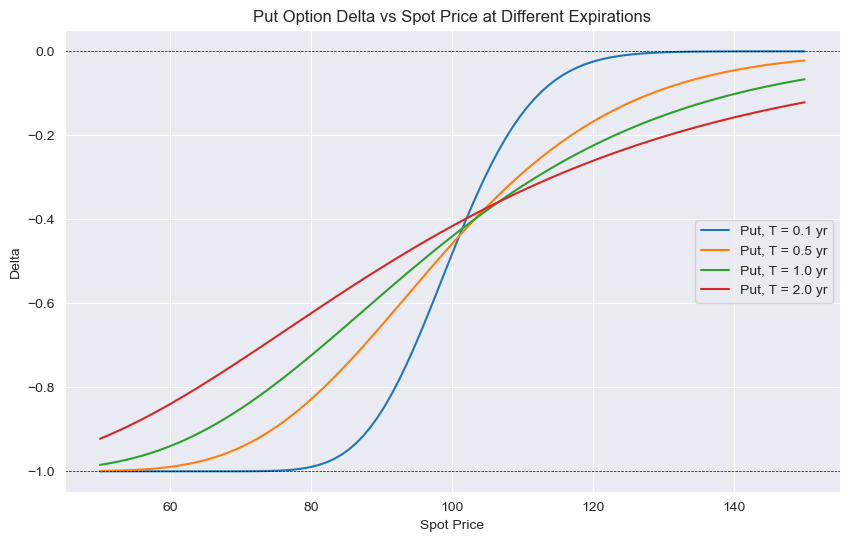

In [33]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    delta_p = delta_put(S_vals, K, r, T, sigma)
    plt.plot(S_vals, delta_p, label=f'Put, T = {T:.1f} yr')

plt.title('Put Option Delta vs Spot Price at Different Expirations')
plt.xlabel('Spot Price')
plt.ylabel('Delta')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axhline(-1, color='black', lw=0.5, linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

#### Options Delta vs Time to Expiration (Fix Spot Prices)

##### Call option

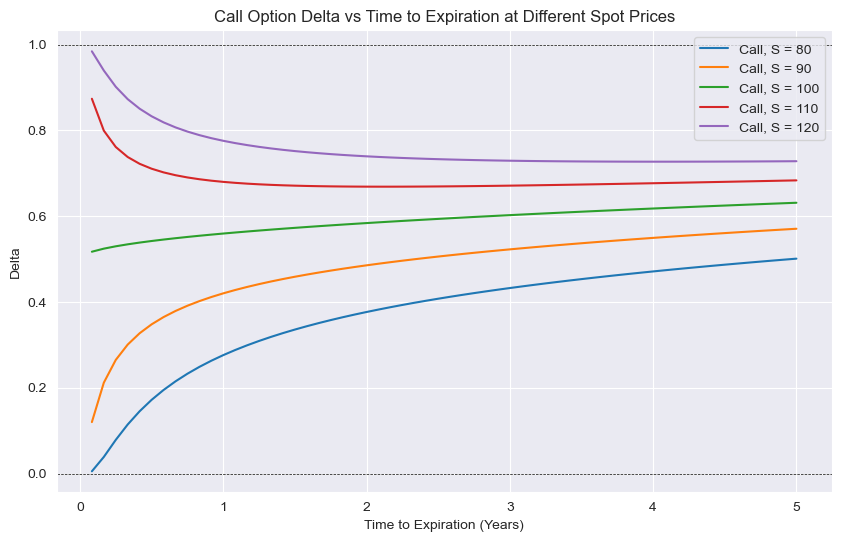

In [34]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    delta_c = delta_call(S, K, r, T_vals, sigma)
    plt.plot(T_vals, delta_c, label=f'Call, S = {S}')

plt.title('Call Option Delta vs Time to Expiration at Different Spot Prices')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Delta')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axhline(1, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


##### Put option

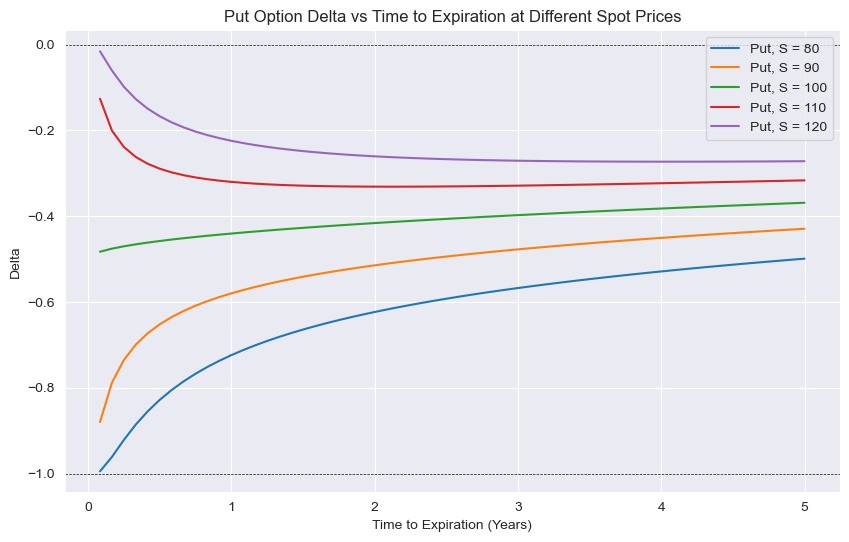

In [35]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    delta_p = delta_put(S, K, r, T_vals, sigma)
    plt.plot(T_vals, delta_p, label=f'Put, S = {S}')


plt.title('Put Option Delta vs Time to Expiration at Different Spot Prices')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Delta')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axhline(-1, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


#### Options Gamma vs Spot Price (Fix Time to Expiration)

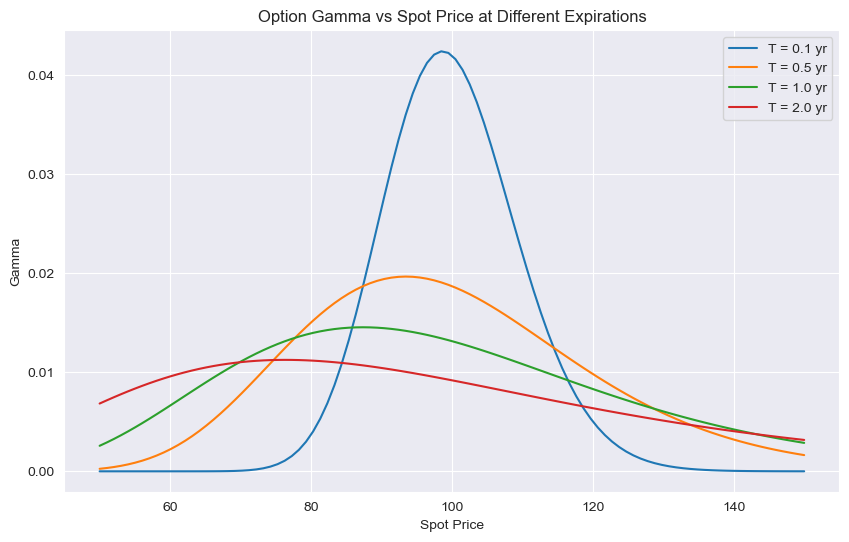

In [36]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    gamma_vals = gamma(S_vals, K, r, T, sigma)
    plt.plot(S_vals, gamma_vals, label=f'T = {T:.1f} yr')

plt.title('Option Gamma vs Spot Price at Different Expirations')
plt.xlabel('Spot Price')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()


#### Options Gamma vs Time to Expiration (Fix Spot Price)

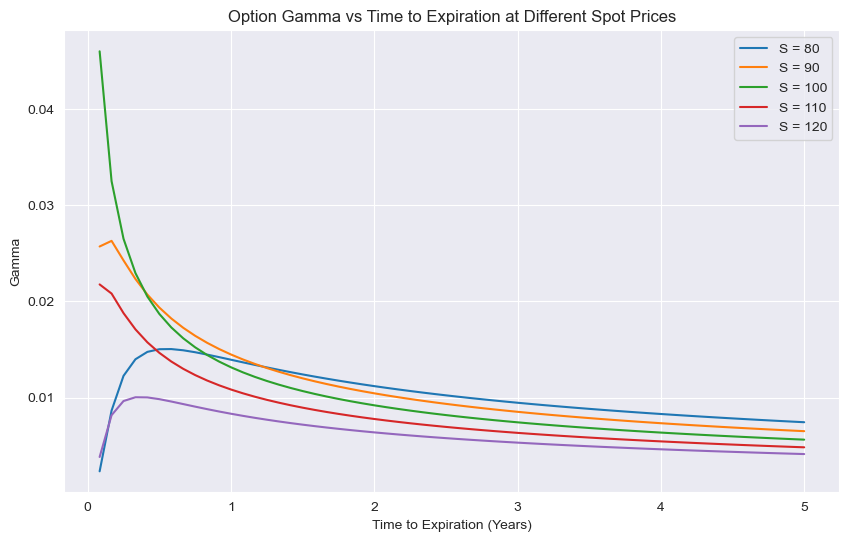

In [37]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    gamma_vals = gamma(S, K, r, T_vals, sigma)
    plt.plot(T_vals, gamma_vals, label=f'S = {S}')

plt.title('Option Gamma vs Time to Expiration at Different Spot Prices')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()


#### Options Vega vs Spot Price (Fix Time to Expiration)

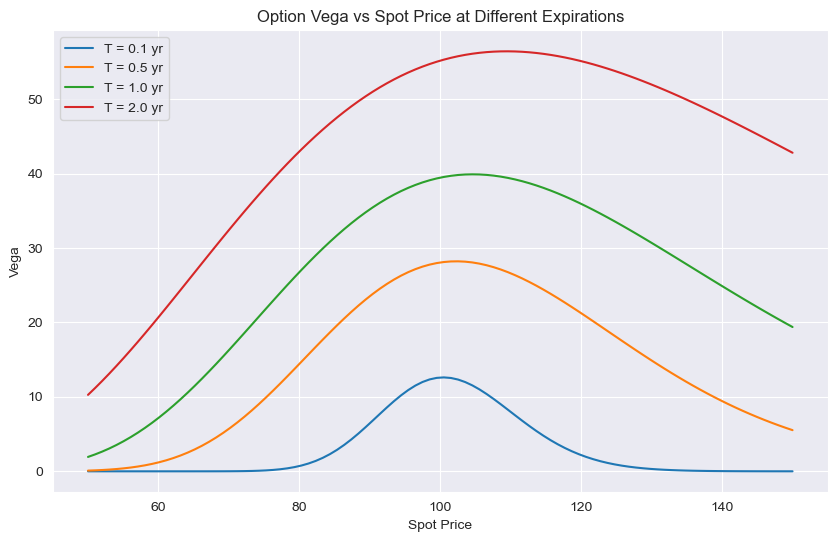

In [38]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    vega_vals = vega(S_vals, K, r, T, sigma)
    plt.plot(S_vals, vega_vals, label=f'T = {T:.1f} yr')

plt.title('Option Vega vs Spot Price at Different Expirations')
plt.xlabel('Spot Price')
plt.ylabel('Vega')
plt.legend()
plt.grid(True)
plt.show()


#### Options Vega vs Time to Expiration (Fix Spot Price)

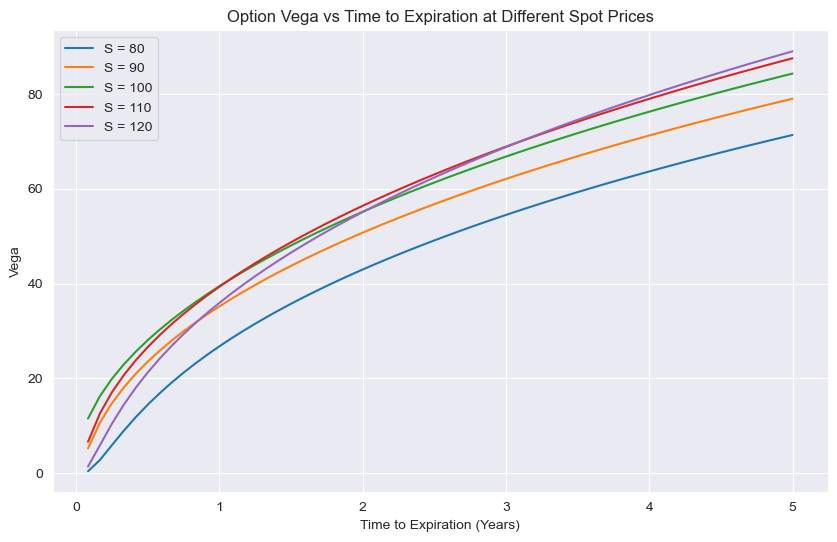

In [39]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    vega_vals = vega(S, K, r, T_vals, sigma)
    plt.plot(T_vals, vega_vals, label=f'S = {S}')

plt.title('Option Vega vs Time to Expiration at Different Spot Prices')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Vega')
plt.legend()
plt.grid(True)
plt.show()


#### Option's Theta vs Spot Price (Fix Time to Expiration)

##### Call Option

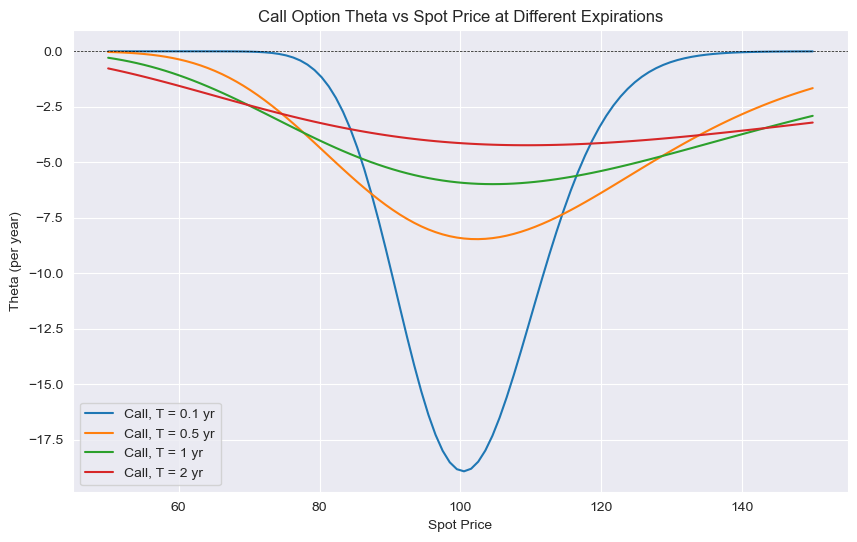

In [40]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    theta_c = theta_call(S_vals, K, r, T, sigma)
    plt.plot(S_vals, theta_c, label=f'Call, T = {T} yr')

plt.title('Call Option Theta vs Spot Price at Different Expirations')
plt.xlabel('Spot Price')
plt.ylabel('Theta (per year)')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


##### Put option

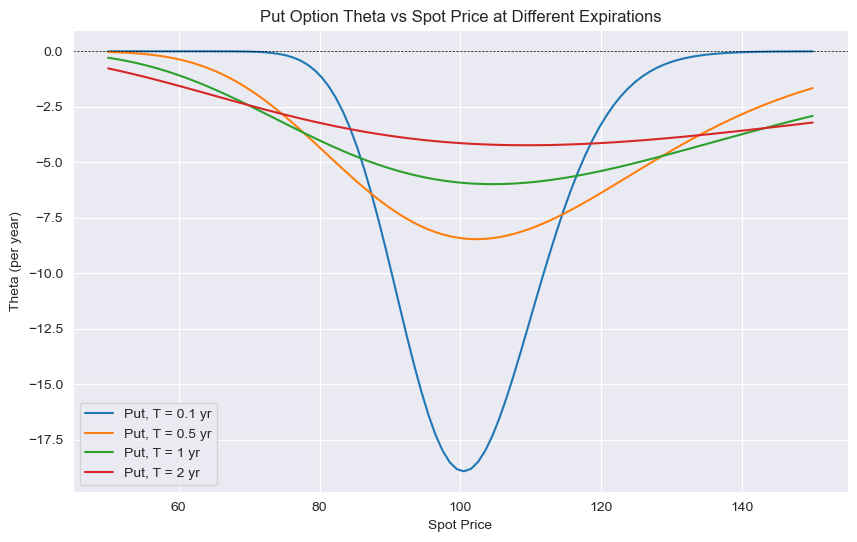

In [46]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    theta_p = theta_put(S_vals, K, r, T, sigma)
    plt.plot(S_vals, theta_p, label=f'Put, T = {T} yr')

plt.title('Put Option Theta vs Spot Price at Different Expirations')
plt.xlabel('Spot Price')
plt.ylabel('Theta (per year)')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


####  Option's Theta vs Time to Expiration (Fix Spot Price)

##### Call Option

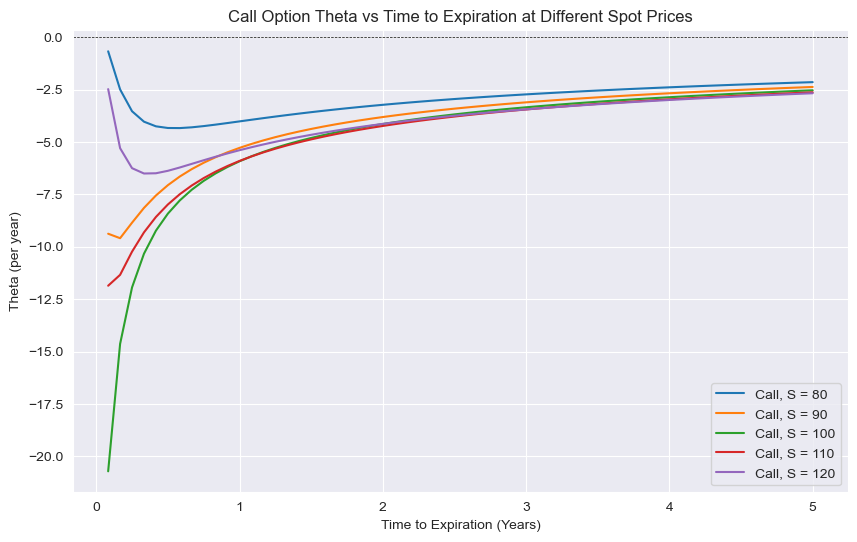

In [42]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    theta_c = theta_call(S, K, r, T_vals, sigma)
    plt.plot(T_vals, theta_c, label=f'Call, S = {S}')

plt.title('Call Option Theta vs Time to Expiration at Different Spot Prices')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Theta (per year)')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


##### Put option

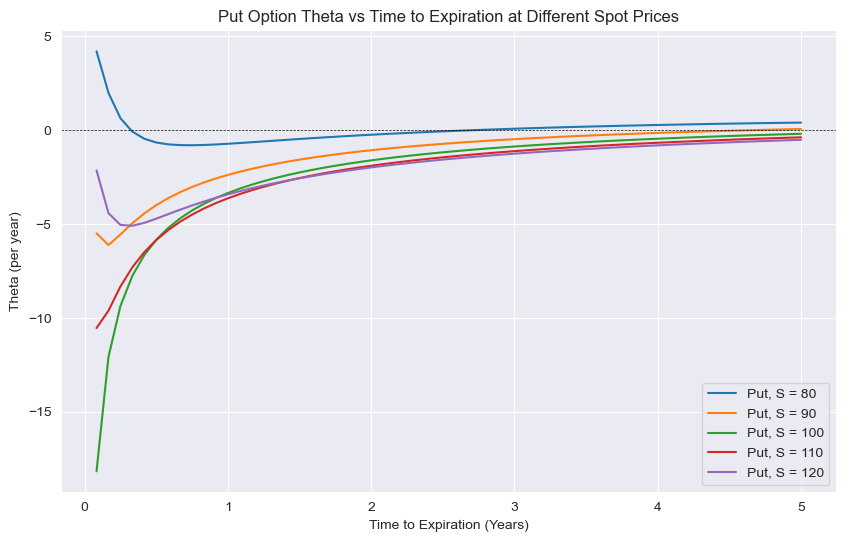

In [52]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    theta_p = theta_put(S, K, r, T_vals, sigma)
    plt.plot(T_vals, theta_p, label=f'Put, S = {S}')

plt.title('Put Option Theta vs Time to Expiration at Different Spot Prices')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Theta (per year)')
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


#### Options Rho vs Spot Price (Fix Time to Expiration)

##### Call Option

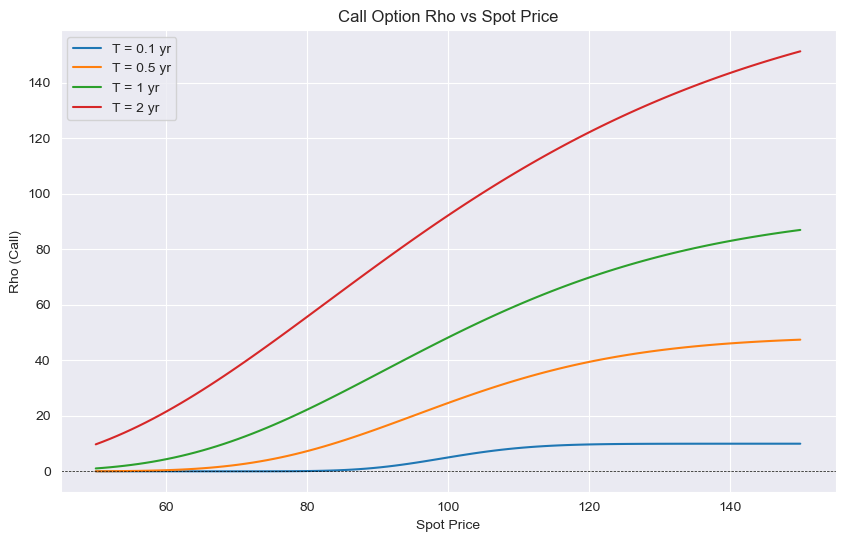

In [53]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    plt.plot(S_vals, rho_call(S_vals, K, r, T, sigma), label=f'T = {T} yr')

plt.title('Call Option Rho vs Spot Price')
plt.xlabel('Spot Price')
plt.ylabel('Rho (Call)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.show()


##### Put Option

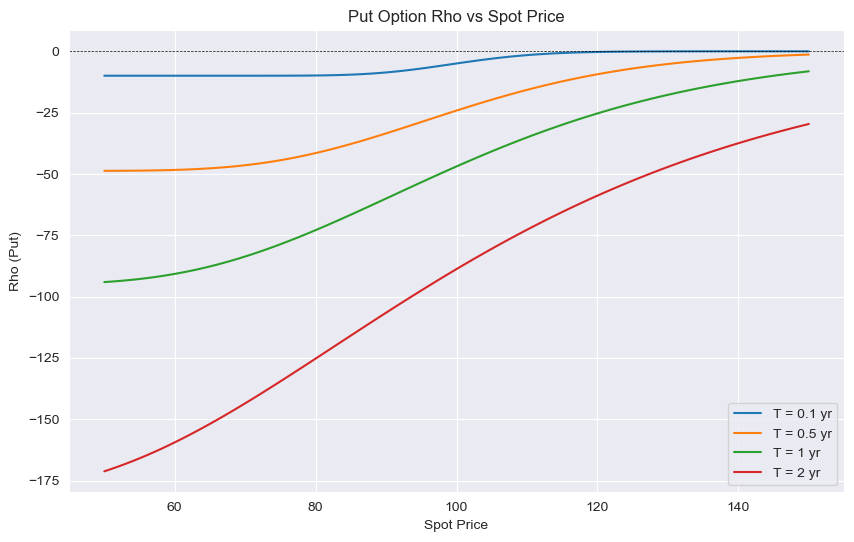

In [54]:
plt.figure(figsize=(10, 6))
for T in [0.1, 0.5, 1, 2]:
    plt.plot(S_vals, rho_put(S_vals, K, r, T, sigma), label=f'T = {T} yr')

plt.title('Put Option Rho vs Spot Price')
plt.xlabel('Spot Price')
plt.ylabel('Rho (Put)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.show()


#### Options Rho vs Time to Expiration  (Fix Spot Price)

##### Call option

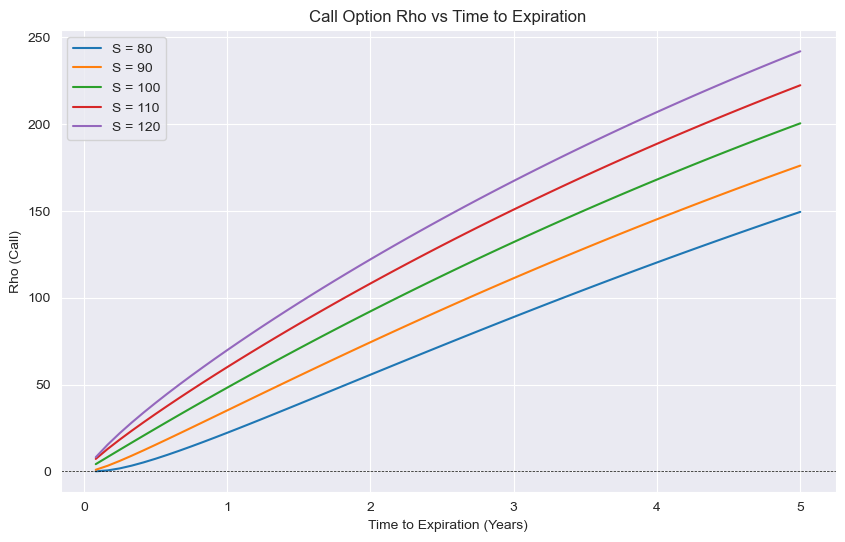

In [55]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    plt.plot(T_vals, rho_call(S, K, r, T_vals, sigma), label=f'S = {S}')

plt.title('Call Option Rho vs Time to Expiration')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Rho (Call)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.show()


##### Put option

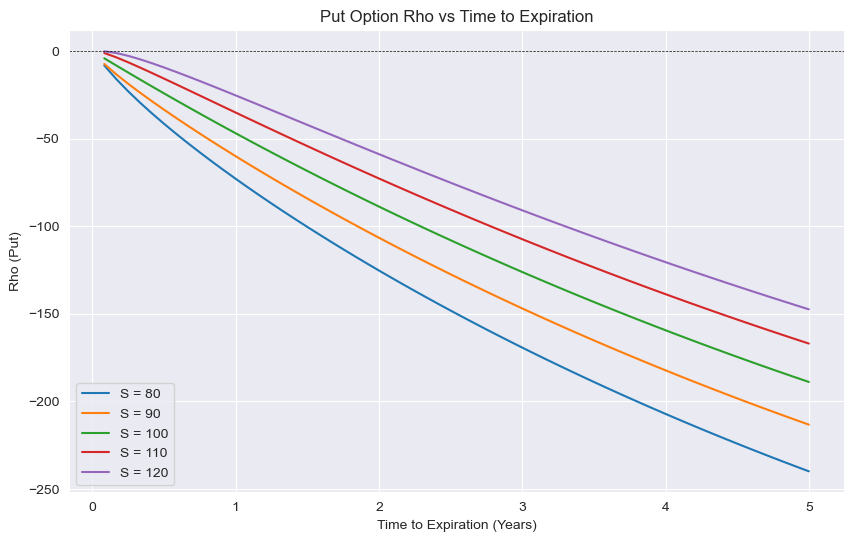

In [56]:
plt.figure(figsize=(10, 6))
for S in [80, 90, 100, 110, 120]:
    plt.plot(T_vals, rho_put(S, K, r, T_vals, sigma), label=f'S = {S}')

plt.title('Put Option Rho vs Time to Expiration')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Rho (Put)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.show()


#### Implied Volatility from Black-Scholes Prices

We will price options using a constant volatility with the Black-Scholes model. And then we will invert the prices using the three numerical methods to recover the volatility.

In [57]:
from scipy.optimize import brentq

In [131]:
# Black-Scholes Pricing Functions 
def bs_call_price(S, K, sigma, t, r):
    if t <= 0 or sigma <= 0:
        return max(S - K, 0)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)

def bs_put_price(S, K, sigma, t, r):
    if t <= 0 or sigma <= 0:
        return max(K - S, 0)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return K * np.exp(-r*t) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Vega
def bs_vega(S, K, sigma, t, r):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*t) / (sigma * np.sqrt(t))
    return S * norm.pdf(d1) * np.sqrt(t)

# Implied Volatility Estimators 

# Newton-Raphsan with vega as derivative
def implied_vol_vega(price, S, K, t, r, is_call=True, tol=1e-6, max_iter=100):
    sigma = 0.3
    price_func = bs_call_price if is_call else bs_put_price
    for _ in range(max_iter):
        vega = bs_vega(S, K, sigma, t, r)
        if vega == 0:
            return np.nan
        diff = price_func(S, K, sigma, t, r) - price
        sigma -= diff / vega
        if abs(diff) < tol:
            return sigma
        if sigma <= 0:
            return np.nan
    return np.nan

# Newton-Raphsan with finite differences
def implied_vol_fd(price, S, K, t, r, is_call=True, tol=1e-6, max_iter=100):
    price_func = bs_call_price if is_call else bs_put_price
    def f(sigma): return price_func(S, K, sigma, t, r) - price
    sigma = 0.3
    for _ in range(max_iter):
        dx = 1e-5
        derivative = (f(sigma + dx) - f(sigma)) / dx
        if abs(derivative) < 1e-8:
            return np.nan
        step = f(sigma) / derivative
        sigma -= step
        if abs(step) < tol:
            return sigma
    return np.nan

# Brents method
def implied_vol_brent(price, S, K, t, r, is_call=True):
    price_func = bs_call_price if is_call else bs_put_price
    def objective(sigma): return price_func(S, K, sigma, t, r) - price
    try:
        return brentq(objective, 1e-5, 3.0)
    except:
        return np.nan

# Parameters 
S = 100
t = 0.5
r = 0.02
true_sigma = 0.3
K_vals = np.linspace(60, 140, 60)

# Generate call and put prices with true sigma
call_prices = [bs_call_price(S, K, true_sigma, t, r) for K in K_vals]
put_prices  = [bs_put_price(S, K, true_sigma, t, r) for K in K_vals]

# Recover implied volatilities
iv_call_vega  = [implied_vol_vega(p, S, K, t, r, is_call=True) for K, p in zip(K_vals, call_prices)]
iv_call_fd    = [implied_vol_fd(p, S, K, t, r, is_call=True) for K, p in zip(K_vals, call_prices)]
iv_call_brent = [implied_vol_brent(p, S, K, t, r, is_call=True) for K, p in zip(K_vals, call_prices)]

iv_put_vega   = [implied_vol_vega(p, S, K, t, r, is_call=False) for K, p in zip(K_vals, put_prices)]
iv_put_fd     = [implied_vol_fd(p, S, K, t, r, is_call=False) for K, p in zip(K_vals, put_prices)]
iv_put_brent  = [implied_vol_brent(p, S, K, t, r, is_call=False) for K, p in zip(K_vals, put_prices)]

# DataFrame for analysis
import pandas as pd


df = pd.DataFrame({
    "Strike": K_vals,
    "Call_IV_Vega": iv_call_vega,
    "Call_IV_FD": iv_call_fd,
    "Call_IV_Brent": iv_call_brent,
    "Put_IV_Vega": iv_put_vega,
    "Put_IV_FD": iv_put_fd,
    "Put_IV_Brent": iv_put_brent,
})


#df.head()


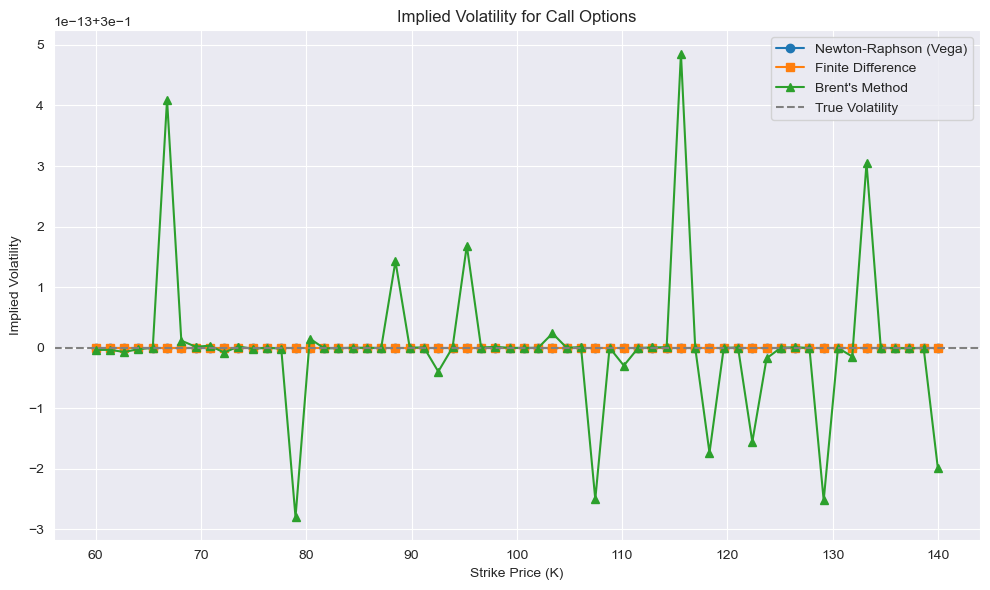

In [132]:
# Plots for call option
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_vals, iv_call_vega, label='Newton-Raphson (Vega)', marker='o')
plt.plot(K_vals, iv_call_fd, label='Finite Difference', marker='s')
plt.plot(K_vals, iv_call_brent, label="Brent's Method", marker='^')
plt.axhline(y=true_sigma, linestyle='--', color='gray', label='True Volatility')
plt.title('Implied Volatility for Call Options')
plt.xlabel('Strike Price (K)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


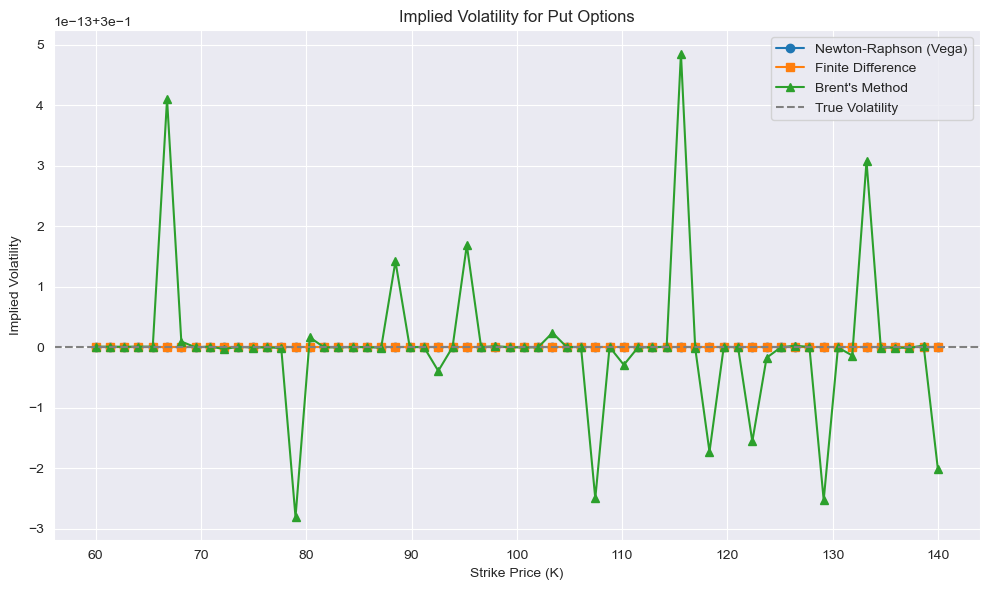

In [133]:
#Plots for Put options
plt.figure(figsize=(10, 6))
plt.plot(K_vals, iv_put_vega, label='Newton-Raphson (Vega)', marker='o')
plt.plot(K_vals, iv_put_fd, label='Finite Difference', marker='s')
plt.plot(K_vals, iv_put_brent, label="Brent's Method", marker='^')
plt.axhline(y=true_sigma, linestyle='--', color='gray', label='True Volatility')
plt.title('Implied Volatility for Put Options')
plt.xlabel('Strike Price (K)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now we will generate synthetic option prices from the Black-Scholes model using this strike-dependent volatility.And then we will use those synthetic prices to estimate the implied volatility using numerical methods

In [100]:
# Black-Scholes Call Price
def bs_call_price(S, K, sigma, t, r):
    if t <= 0:
        return max(S - K, 0)
    if sigma <= 0:
        return max(S - K * np.exp(-r * t), 0)  # enforce positivity
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return S * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)
    
# Vega (derivative of option price w.r.t. sigma)
def bs_vega(S, K, sigma, t, r):
    if t <= 0:
        return 0
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    return S * norm.pdf(d1) * np.sqrt(t)


        

Implied Volatility Estimators

In [112]:
#  Strike-dependent volatility (simulating the smile) 
def smile_volatility(K, S0=100, base=0.2, intensity=0.002):
    return base + intensity * (K - S0)**2

# Newton-Raphson using Vega
def implied_vol_vega(price, S, K, t, r, tol=1e-6, max_iter=100):
    sigma = 0.2
    for _ in range(max_iter):
        vega = bs_vega(S, K, sigma, t, r)
        if vega == 0 or np.isnan(vega):
            return np.nan
        diff = bs_call_price(S, K, sigma, t, r) - price
        sigma -= diff / vega
        sigma = max(1e-5, min(sigma, 5))  # Clamp to avoid overflow
        if abs(diff) < tol:
            return sigma
    return np.nan


# Newton-Raphson using Finite Difference 
def newton_fd(f, x0, tol=1e-6, max_iter=100):
    def df(x):
        dx = 1e-5
        return (f(x + dx) - f(x)) / dx
    for _ in range(max_iter):
        derivative = df(x0)
        if abs(derivative) < 1e-8 or np.isnan(derivative):
            return np.nan
        step = f(x0) / derivative
        x0 -= step
        x0 = max(1e-5, min(x0, 5))  # Clamp sigma
        if abs(step) < tol:
            return x0
    return np.nan

def implied_vol_fd(price, S, K, t, r):
    f = lambda sigma: bs_call_price(S, K, sigma, t, r) - price
    return newton_fd(f, 0.02)


# Brent’s Method
def implied_vol_brentq(price, S, K, t, r=0):
    intrinsic = max(S - K, 0)
    upper_bound = S
    if price < intrinsic or price > upper_bound:
        return np.nan
    def objective(sigma):
        return bs_call_price(S, K, sigma, t, r) - price
    try:
        implied_vol = brentq(objective, 1e-5, 5, maxiter=500)
        return implied_vol if implied_vol > 0 else np.nan
    except (ValueError, RuntimeError):
        return np.nan


Evaluation

In [113]:
# Parameters
S = 100
t = 0.5
r = 0.02
true_sigma = 0.3
K_vals = np.linspace(60, 140, 80) # Strike prices

# Generate market prices using smile volatility
market_prices = [bs_call_price(S, K, smile_volatility(K, S), t, r) for K in K_vals]

# === Estimate implied volatilities ===
iv_vega  = [implied_vol_vega(p, S, K, t, r) for K, p in zip(K_vals, market_prices)]
iv_fd    = [implied_vol_fd(p, S, K, t, r) for K, p in zip(K_vals, market_prices)]
iv_brent = [implied_vol_brentq(p, S, K, t, r) for K, p in zip(K_vals, market_prices)]




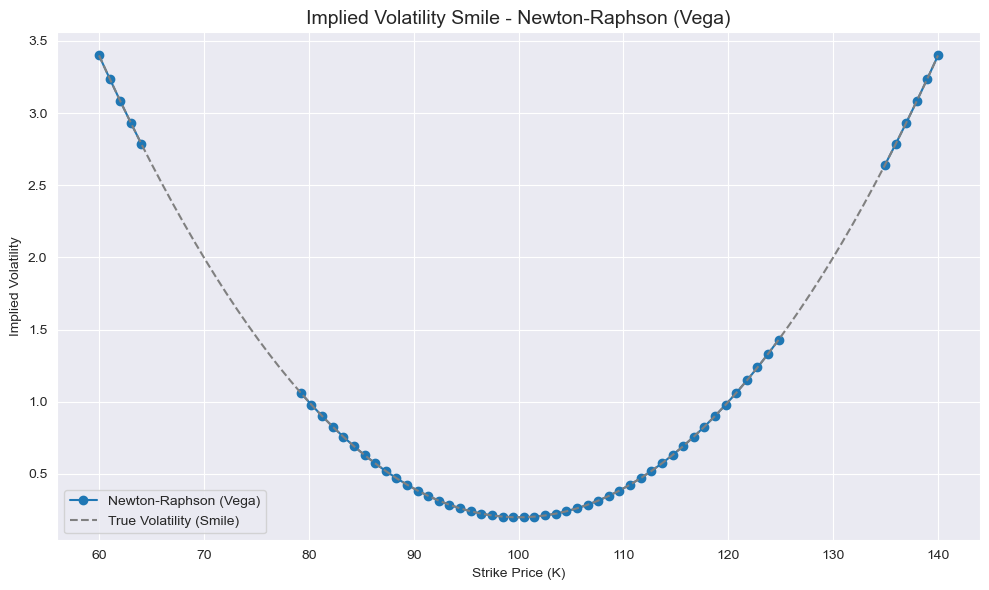

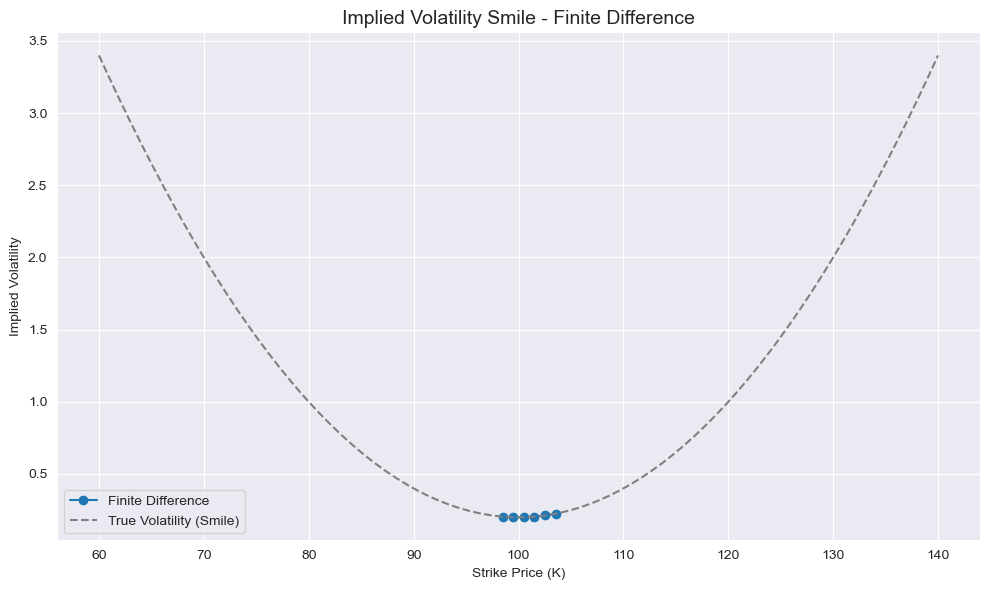

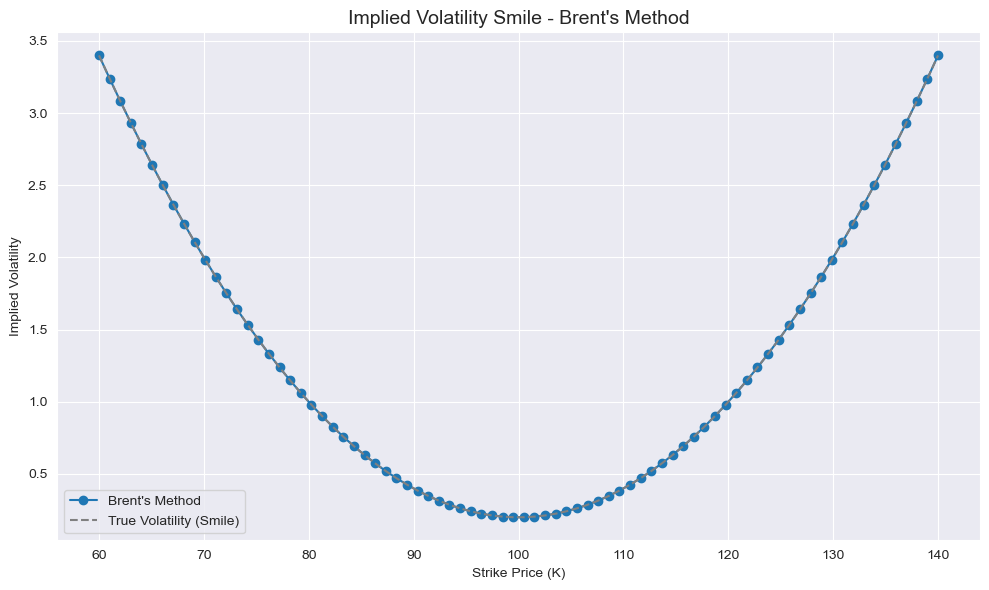

In [126]:

#Plot the smile for each method
methods = {
    'Newton-Raphson (Vega)': iv_vega,
    'Finite Difference': iv_fd,
    "Brent's Method": iv_brent
}

for name, ivs in methods.items():
    plt.figure(figsize=(10, 6))
    plt.plot(K_vals, ivs, label=f'{name}', marker='o')
    plt.plot(K_vals, [smile_volatility(K, S) for K in K_vals], label='True Volatility (Smile)', linestyle='--', color='gray')
    plt.title(f'Implied Volatility Smile - {name}', fontsize=14)
    plt.xlabel('Strike Price (K)')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Implied Volatility for Put Options from Black-Scholes

In [122]:
# Black-Scholes formula for put option
def bs_put_price(S, K, sigma, t, r):
    if t <= 0:
        return max(K - S, 0)
    if sigma <= 1e-6:
        return max(K * np.exp(-r * t) - S, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return K * np.exp(-r * t) * norm.cdf(-d2) - S * norm.cdf(-d1)

def bs_vega(S, K, sigma, t, r):
    if t <= 0 or sigma <= 1e-6:
        return 0
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    return S * norm.pdf(d1) * np.sqrt(t)

# Newton-Raphson with Vega
def implied_vol_put_vega(price, S, K, t, r, tol=1e-6, max_iter=100):
    sigma = 0.2
    for _ in range(max_iter):
        vega = bs_vega(S, K, sigma, t, r)
        if vega == 0:
            return np.nan
        diff = bs_put_price(S, K, sigma, t, r) - price
        sigma -= diff / vega
        if abs(diff) < tol:
            return sigma
    return np.nan

# Newton-Raphson with Finite Difference
def newton_fd(f, x0, tol=1e-6, max_iter=100):
    def df(x):
        dx = 1e-5
        return (f(x + dx) - f(x)) / dx

    for _ in range(max_iter):
        derivative = df(x0)
        if abs(derivative) < 1e-8:
            return np.nan  # Avoid division by near-zero
        step = f(x0) / derivative
        if abs(step) < tol:
            return x0
        x0 -= step
        if x0 <= 0:
            return np.nan  # Implied volatility must be positive
    return np.nan

def implied_vol_put_fd(price, S, K, t, r):
    f = lambda sigma: bs_put_price(S, K, sigma, t, r) - price
    return newton_fd(f, 0.2)

# Brent's Method
def implied_vol_put_brentq(price, S, K, t, r=0):
    intrinsic = max(K - S, 0)
    upper_bound = K

    if price < intrinsic or price > upper_bound:
        return np.nan

    def objective(sigma):
        return bs_put_price(S, K, sigma, t, r) - price

    try:
        implied_vol = brentq(objective, 1e-5, 5, maxiter=500)
        return implied_vol if implied_vol > 0 else np.nan
    except (ValueError, RuntimeError):
        return np.nan
def true_smile(K, S0=100, base=0.2, intensity=0.002):
    return base + intensity * (K - S0)**2


In [123]:
S = 100
t = 0.5
r = 0.02
K_vals = np.linspace(60, 140, 80)
true_smile = lambda K, S: 0.3 + 0.002 * np.abs(K/S - 1)  # Synthetic smile
# Generate market prices for put options using the synthetic smile
market_prices_put = [bs_put_price(S, K, true_smile(K, S), t, r) for K in K_vals]

In [124]:
# Estimate implied volatilities
iv_put_vega  = [implied_vol_put_vega(p, S, K, t, r) for K, p in zip(K_vals, market_prices_put)]
iv_put_fd    = [implied_vol_put_fd(p, S, K, t, r) for K, p in zip(K_vals, market_prices_put)]
iv_put_brent = [implied_vol_put_brentq(p, S, K, t, r) for K, p in zip(K_vals, market_prices_put)]

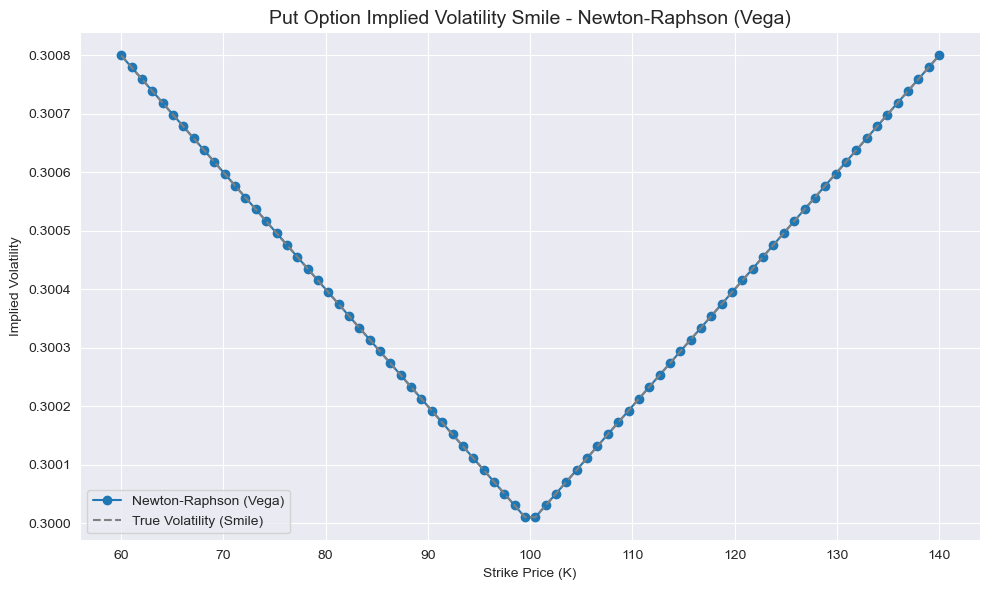

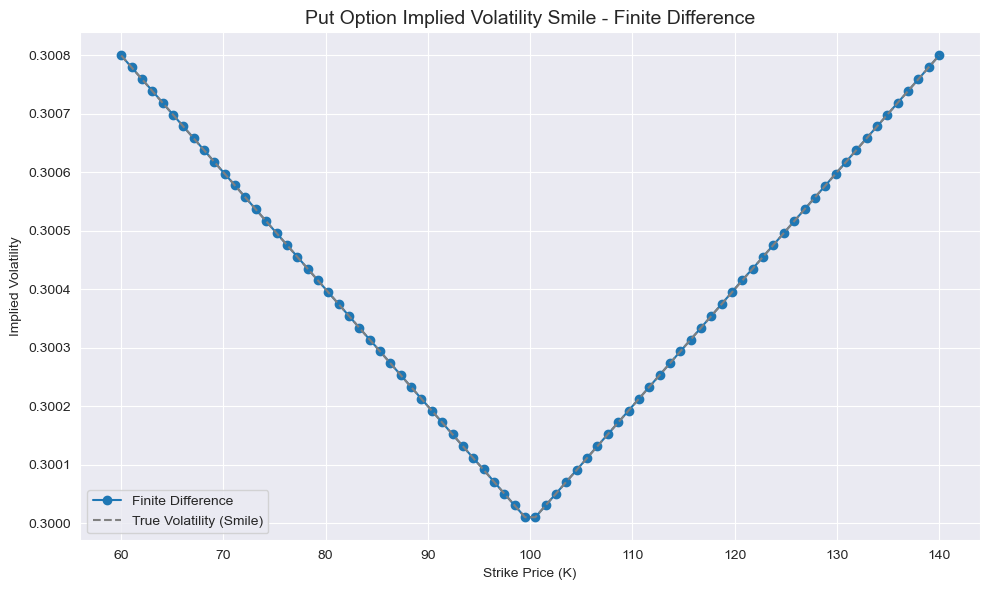

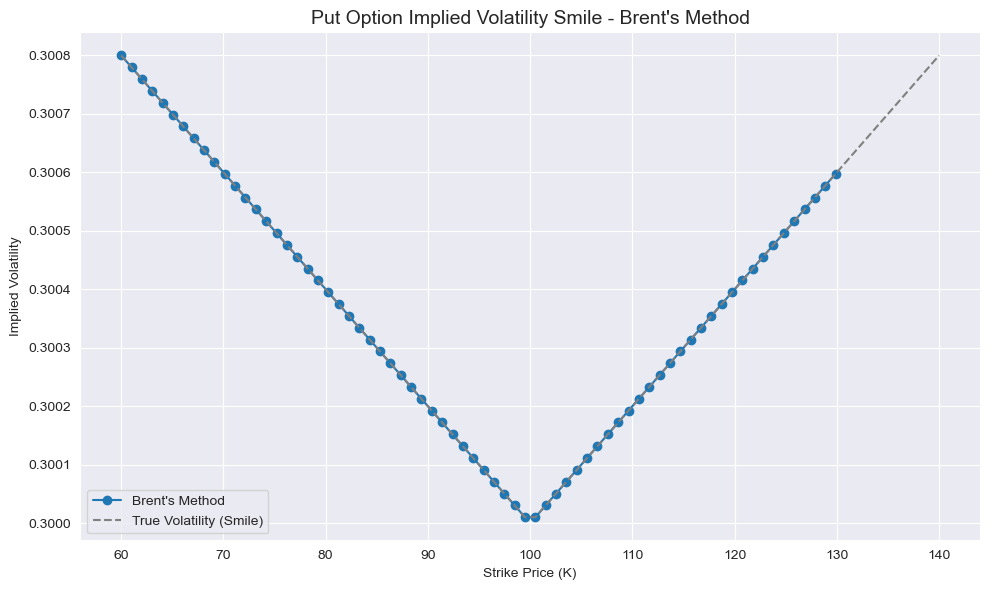

In [125]:
methods_put = {
    'Newton-Raphson (Vega)': iv_put_vega,
    'Finite Difference': iv_put_fd,
    "Brent's Method": iv_put_brent
}

for name, ivs in methods_put.items():
    plt.figure(figsize=(10, 6))
    plt.plot(K_vals, ivs, label=f'{name}', marker='o')
    plt.plot(K_vals, [true_smile(K, S) for K in K_vals], label='True Volatility (Smile)', linestyle='--', color='gray')
    plt.title(f'Put Option Implied Volatility Smile - {name}', fontsize=14)
    plt.xlabel('Strike Price (K)')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
